# Кластеризация

Сгенерируем точки из трех кластеров

In [1]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pylab as plt

import warnings
warnings.filterwarnings("ignore")

Text(0, 0.5, 'y')

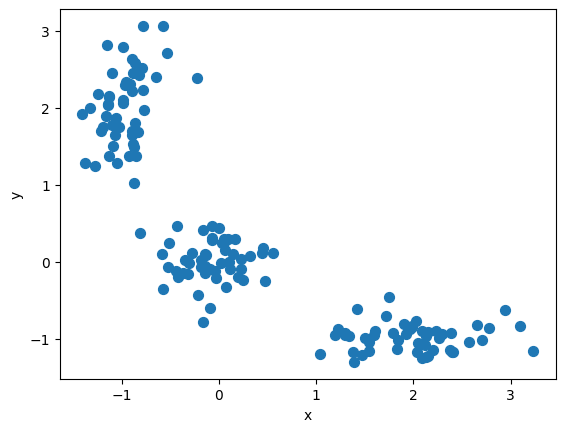

In [2]:
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.scatter(X[...,0], X[...,1], s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

Применим kmeans

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Text(0, 0.5, 'y')

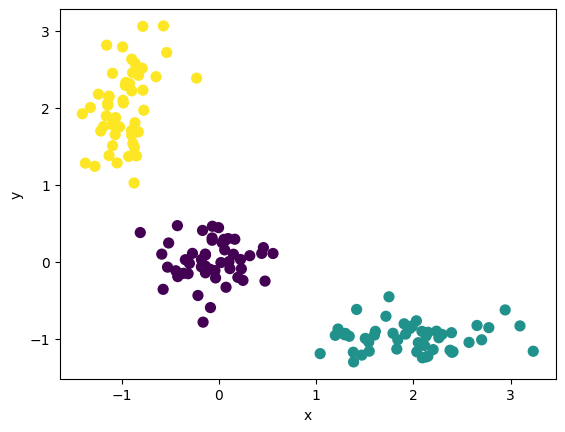

In [4]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)
print(kmeans.labels_) #список из номеров кластеров для каждого объекта обучающей выборки

plt.scatter(X[:,0], X[:,1], c = kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

Применим иерархическую кластеризацию.

In [5]:
!pip install scipy


[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


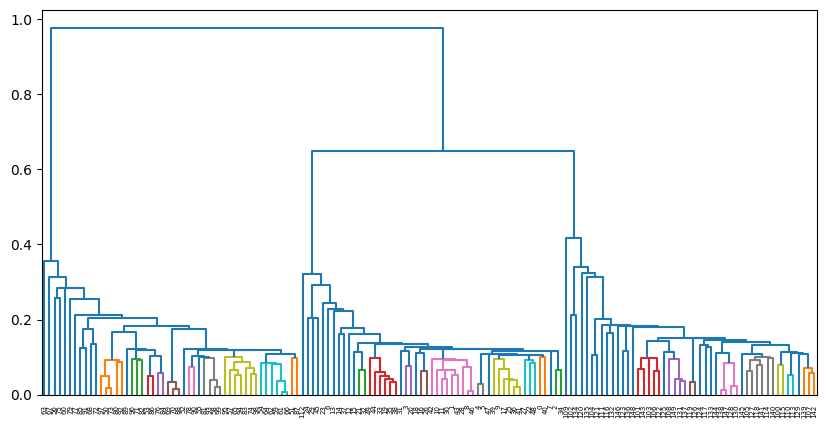

In [6]:
# from sclearn.cluster import AgglomerativeClustering

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.1)

Что произойдет, если подобрать неверное число кластеров?

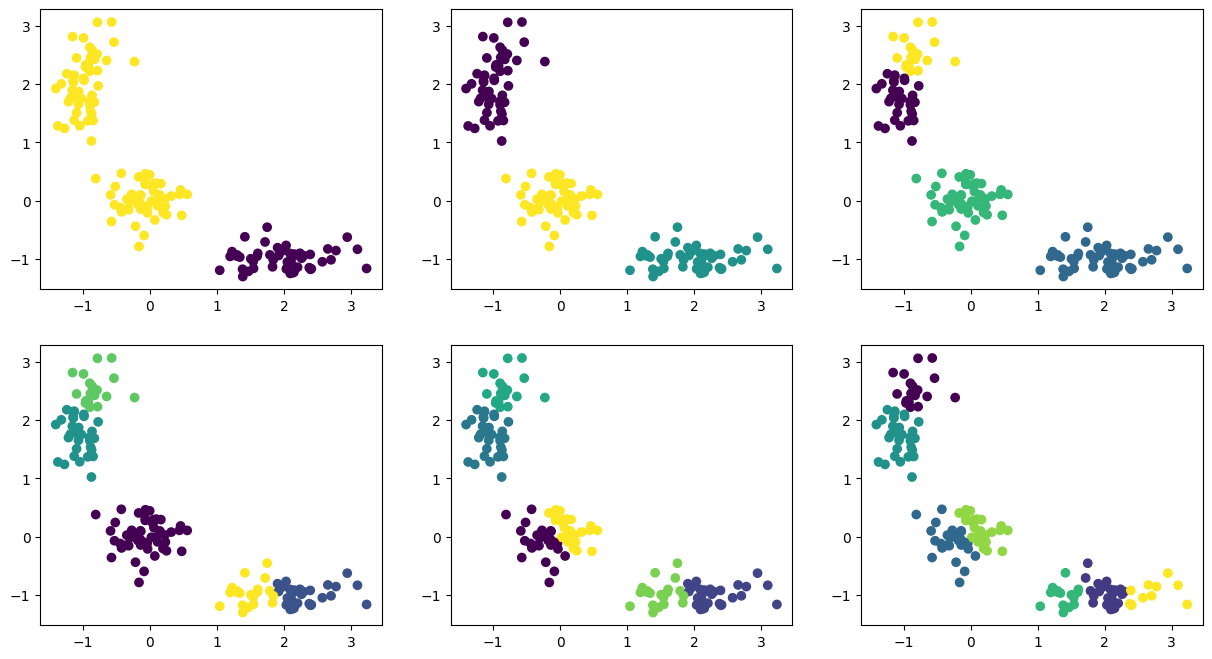

In [7]:
plt.figure(figsize= (15,8))
for n_c in range(2,8):
    kmeans = KMeans(n_clusters = n_c)
    kmeans = kmeans.fit(X)

    plt.subplot(2,3,n_c - 1)
    plt.scatter(X[:,0], X[:,1], c = kmeans.labels_)

plt.show()